# 欧拉法
$\begin{equation}  
\left\{  
             \begin{array}{**lr**}
             \dfrac{dy}{dx} = f(x,y)\\
             y(x_0) = y_0 \\
             \end{array}  
\right.  
\end{equation}$


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import pandas as pd
%matplotlib inline

In [14]:
# 符号化变量
x,y = sy.symbols('x y')

# 输出设置
sy.init_printing(use_latex=True)
#输出示例
x**2+y**3

In [15]:
#f(x,y)转为numpy示例
a = np.arange(0,5,1)
b = np.arange(5,10,1)
x,y = sy.symbols('x y')
expr = 2*x+y
f = sy.lambdify((x,y), expr, "numpy")
f(x=a,y=b)


array([ 5,  8, 11, 14, 17])

In [16]:
a = np.arange(10)

expr = x**2

# 构造自己的函数
f = sy.lambdify(x, expr, "numpy")

f(a)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [17]:
#numpy线性函数
p = np.poly1d([1,2,0,3,0,5])
print(p)
print(p.deriv(1), '=',p.deriv(1)(1))

   5     4     2
1 x + 2 x + 3 x + 5
   4     3
5 x + 8 x + 6 x = 19


### 定义欧拉法、隐式梯形法、改进欧拉法的函数

In [36]:
def calculate_f_xy(derivative,x=None,y=None):
    '''根据f(x,y)参数个数采用不同赋值'''
    if x and y:
        return None
    elif 'x' in derivative.__code__.co_varnames:
        dy_dx = derivative(x=x)
    elif 'y' in derivative.__code__.co_varnames:
        dy_dx = derivative(y=y)
    else:
        dy_dx = derivative(x=x, y=y)
        
# def base_euler(derivative, n=50, limit=(0,1), begin=(0,1)):
#     '''
#     欧拉法求微分方程
#     Parameters
#     ----------
#     @derivative 导数dy/dx
#     @n 步长
#     @limit 函数区间（start, end）
#     @begin 初值（x0, y0）
#     '''
# #     derivative = np.poly1d(derivative)
#     steps = (limit[1] - limit[0]) / n
#     x = np.linspace(limit[0], limit[1], n)
#     dy_dx = derivative(x)
#     y = np.full(n, begin[1], dtype=np.float32)
#     y[1:] = y[1:] + np.cumsum(steps * dy_dx)[:-1]
#     return x, y

def base_euler(derivative, n=50, limit=(0,1), begin=(0,1)):
    '''
    欧拉法求微分方程
    Parameters
    ----------
    @derivative 导数dy/dx
    @n 步长
    @limit 函数区间（start, end）
    @begin 初值（x0, y0）
    '''
#     derivative = np.poly1d(derivative)
    step = (limit[1] - limit[0]) / n
    x = np.linspace(limit[0], limit[1], n)
#     dy_dx = derivative(x)
    y = np.full(n, begin[1], dtype=np.float32)
    for i in range(1, n):
        y[i] = y[i-1] + step * derivative(y[i-1])
#     y[1:] = y[1:] + np.cumsum(steps * dy_dx)[:-1]
    return x, y

def improve_euler(derivative, n=50, limit=(0,1), begin=(0,1)):
    '''
    改进欧拉法求微分方程
    Parameters
    ----------
    @derivative 导数dy/dx
    @n 步长
    @limit 函数区间（start, end）
    @begin 初值（x0, y0）
    '''
#     derivative = np.poly1d(derivative)
    step = (limit[1] - limit[0]) / n
    x = np.linspace(limit[0] ,limit[1], n)
#     dy_dx = (derivative(x) + derivative(x+steps)) / 2
    y = np.full(n, begin[1], dtype=np.float32)
    for i in range(1, n):
        y[i] = y[i-1] + step / 2 * (derivative(y[i-1]) + \
                                     derivative(y[i-1] + step * derivative(y[i-1])))
#     y[1:] = y[1:] + np.cumsum(steps * dy_dx)[:-1]
    return x, y

def implicit_trapezoidal(derivative, derivative_again, n=50, limit=(0,1), begin=(0,1), e=0.00001):
    '''
    隐式梯形法求微分方程
    Parameters
    ----------
    @derivative 导数dy/dx
    @derivative_again d(dy/dx)/dy
    @n 步长
    @limit 函数区间（start, end）
    @begin 初值（x0, y0）
    @e 收敛判据|y'-y| < e
    '''
#     derivative = np.poly1d(derivative)
    step = (limit[1] - limit[0]) / n
    x = np.linspace(limit[0], limit[1], n)
    y = np.full(n, begin[1], dtype=np.float32)
    for i in range(1, n):
        nocoverage = True
        while(nocoverage):
            F_y = y[i] - y[i-1] - step / 2 * (derivative(y[i-1]) + derivative(y[i]))
            dF_dy = 1 - step / 2 * derivative_again(y[i])
            y[i] -= F_y / dF_dy
            F_y_iter = y[i] - y[i-1] - step / 2 * (derivative(y[i-1]) + derivative(y[i]))
            nocoverage = False if abs(F_y_iter - F_y) < e else True
    return x, y



In [19]:
a = np.arange(0,5,1).reshape(5,1)
b = np.concatenate((a[1:],np.roll(a,1)[1:]),axis=1)
print(b)
# np.apply_over_axes([np.sum,np.cumsum], b, [1,0])
np.cumsum(a[1:] + np.roll(a,1)[1:])

[[1 0]
 [2 1]
 [3 2]
 [4 3]]


array([ 1,  4,  9, 16], dtype=int32)

### 定义输入的导数、步长、函数定义域、原函数

In [55]:
#sympy定义x、y数学符号
x,y = sy.symbols('x y')
#用x、y定义f(x,y)
deriv = -20*y
deriv_2 = sy.lambdify(y, sy.diff(deriv, y), "numpy")
deriv = sy.lambdify(y, deriv, "numpy")
ESS = pd.DataFrame(columns=['Euler','Improve Euler', 'Implicit Trapezoidal'])
ESS.index.name = 'N'

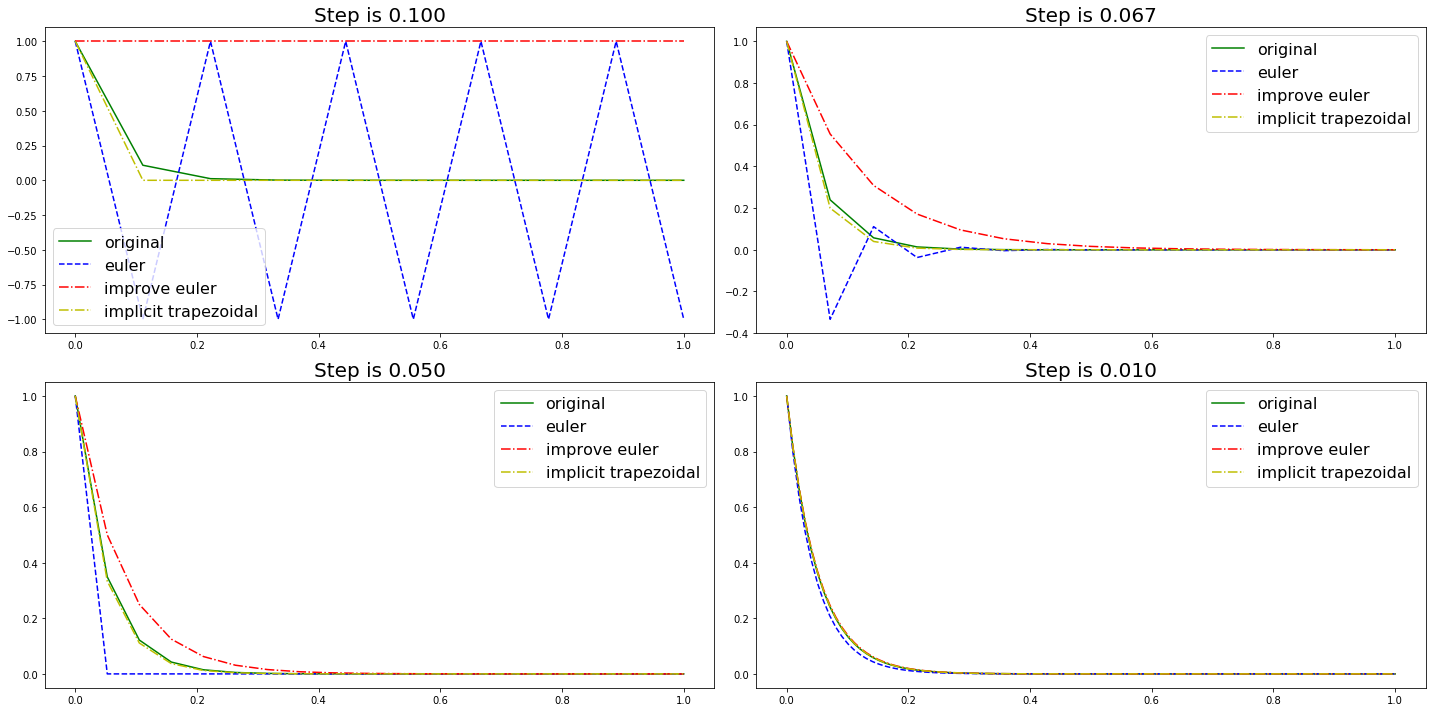

In [56]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
N = [10, 15, 20, 100]
# titles = [$'Steps is 100'$, $'Steps is 50'$, $'Steps is 20'$, $'Steps is 10'$]
for ax, n in zip(axes.flatten(), N):
    n, limit = n, (0,1)
    x_r = np.linspace(limit[0], limit[1], n)
    y_r = sy.lambdify(x, np.e**(-20*x), "numpy")(x_r)
    x_b, y_b = base_euler(deriv, limit=limit, n=n)
    x_i, y_i = improve_euler(deriv, limit=limit, n=n)
    x_it, y_it = implicit_trapezoidal(deriv, deriv_2, limit=limit, n=n)
#     y_r = (lambda t:-10*(t**2)+1)(x)
    # y_r = np.poly1d([1, -1, -20]).integ(1, k=1)(x_r)
    ax.plot(x_r, y_r, '-g', label='original')
    ax.plot(x_b, y_b, '--b', label='euler')
    ax.plot(x_i, y_i, '-.r', label='improve euler')
    ax.plot(x_it, y_it, '-.y', label='implicit trapezoidal')
    ax.set_title(f"Step is {1/n:.3f}",fontsize=20)
    ax.legend(loc='best', prop={'size':16})
    #三种方法的误差平方和
    ESS.loc[str(n),'Euler'] = sum((y_r - y_b)**2)
    ESS.loc[str(n),'Improve Euler'] = sum((y_r - y_i)**2)
    ESS.loc[str(n),'Implicit Trapezoidal'] = sum((y_r - y_it)**2)
    
plt.tight_layout()
# plt.savefig('differential_solve_graph.png',bbox_inches = 'tight')

In [61]:
ESS.to_excel('ESS.xlsx',engine='xlsxwriter')

In [10]:
#显示函数的关键字参数
deriv.__code__.co_varnames

('y',)